# 単回帰（特徴量：MedInc）の予測値の可視化

In [1]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2

In [2]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
1.2.2


In [4]:
# データセットの読み込み
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['MedInc']] # 特徴量にMedInc（世帯所得）を設定
y_train = df.loc[:99, 'MedHouseVal'] # 正解値にMedHouseVal（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:    MedInc
0  8.3252
1  8.3014
2  7.2574
y_train: 0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64


In [6]:
# モデルの学習
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 線形回帰モデル
model.fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [7]:
# 予測値
model.predict(X_train)

array([3.62763539, 3.61946596, 3.26110923, 2.70699499, 2.09020264,
       2.15562677, 2.0259799 , 1.8409319 , 1.48408549, 2.03699834,
       1.86945627, 1.89259156, 1.82548549, 1.6877035 , 1.42789488,
       1.4993946 , 1.72250942, 1.49774698, 1.45343294, 1.66357278,
       1.23605045, 1.35814575, 1.36209317, 1.51847949, 1.66244004,
       1.59509369, 1.61428157, 1.39058321, 1.33374042, 1.34922116,
       1.43156769, 1.44327264, 1.3867731 , 1.24195442, 1.70716598,
       1.28008989, 1.14659857, 1.25407127, 1.96450318, 1.65893886,
       1.4900581 , 1.21113025, 1.12181567, 2.13074089, 1.80403214,
       1.68880192, 1.46541249, 1.36545705, 1.0962776 , 1.37925584,
       1.0863919 , 1.28640575, 1.15126682, 1.19818959, 1.32255035,
       1.25441452, 1.28681766, 1.05048757, 1.18775468, 1.64956803,
       1.9346058 , 2.87010908, 1.07928655, 1.17879576, 1.66031187,
       1.1704547 , 1.04650583, 1.66566663, 1.40554907, 1.10643791,
       1.37819176, 1.02007531, 1.37067451, 0.94157322, 1.62227

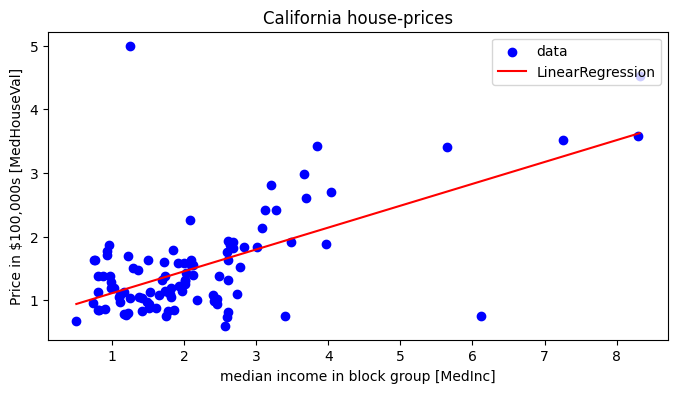

In [8]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = pd.DataFrame({'MedInc': np.arange(X.min(), X.max(), 0.01)})
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='LinearRegression')
plt.ylabel('Price in $100,000s [MedHouseVal]')
plt.xlabel('median income in block group [MedInc]')
plt.title('California house-prices')
plt.legend(loc='upper right')
plt.show()

In [9]:
# パラメータ
print('傾き w1:', model.coef_[0])
print('切片 w0:', model.intercept_) 

傾き w1: 0.3432535718530862
切片 w0: 0.7699807549504893
